In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


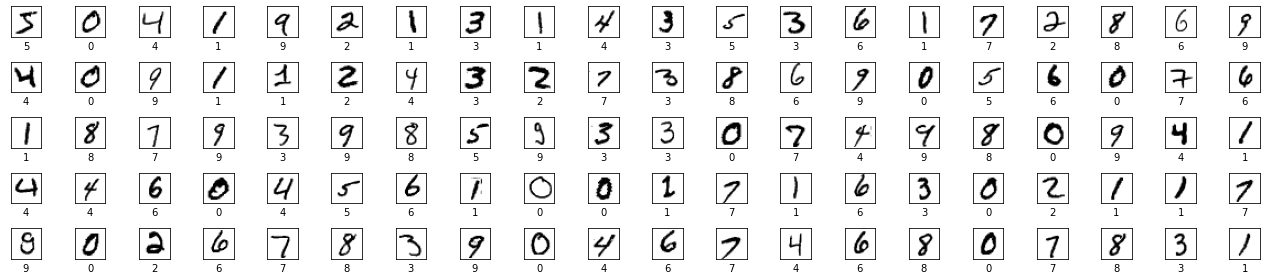

In [3]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(18,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [4]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)
x_train_normalized = x_train.reshape(-1, 28,28,1)/255.0
x_test_normalized = x_test.reshape(-1, 28,28,1)/255.0


In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [6]:
adam_model=model
sgd_model=model
rmsprop_model=model

In [7]:
adam_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
sgd_model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
rmsprop_model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Without The Normalized Data 

In [10]:
h = adam_model.fit(x=x_train, y=y_train, epochs=5,validation_split=0.2,batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 39s 24ms/step - loss: 0.3223 - accuracy: 0.9248 - val_loss: 0.1101 - val_accuracy: 0.9714
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1005 - accuracy: 0.9730 - val_loss: 0.0822 - val_accuracy: 0.9818
Epoch 3/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0866 - accuracy: 0.9782 - val_loss: 0.0920 - val_accuracy: 0.9827
Epoch 4/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0839 - accuracy: 0.9801 - val_loss: 0.1097 - val_accuracy: 0.9757
Epoch 5/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0859 - accuracy: 0.9809 - val_loss: 0.0829 - val_accuracy: 0.9857


In [11]:
test_loss, test_acc = adam_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 7ms/step - loss: 0.0895 - accuracy: 0.9842

Test accuracy: 0.9842000007629395


In [12]:
x = sgd_model.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0961 - accuracy: 0.9807 - val_loss: 0.1094 - val_accuracy: 0.9797
Epoch 2/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0956 - accuracy: 0.9816 - val_loss: 0.1578 - val_accuracy: 0.9746
Epoch 3/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0972 - accuracy: 0.9813 - val_loss: 0.1074 - val_accuracy: 0.9835
Epoch 4/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1016 - accuracy: 0.9811 - val_loss: 0.1188 - val_accuracy: 0.9769
Epoch 5/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.1050 - accuracy: 0.9812 - val_loss: 0.1774 - val_accuracy: 0.9751racy: 0.98


In [13]:
test_loss, test_acc = sgd_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.1692 - accuracy: 0.9769

Test accuracy: 0.9768999814987183


In [14]:
y = rmsprop_model.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 38s 25ms/step - loss: 0.1106 - accuracy: 0.9817 - val_loss: 0.1533 - val_accuracy: 0.9705
Epoch 2/5
1500/1500 [==============================] - 40s 26ms/step - loss: 0.1227 - accuracy: 0.9825 - val_loss: 0.3805 - val_accuracy: 0.9743
Epoch 3/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1182 - accuracy: 0.9803 - val_loss: 0.1253 - val_accuracy: 0.9751
Epoch 4/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.1131 - accuracy: 0.9832 - val_loss: 0.1665 - val_accuracy: 0.9807
Epoch 5/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.1363 - accuracy: 0.9806 - val_loss: 0.1488 - val_accuracy: 0.9810


In [15]:
test_loss, test_acc = rmsprop_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.1443 - accuracy: 0.9842

Test accuracy: 0.9842000007629395


# Comparison without normalized data between  :  Adam vs SGD vs RMSProp 

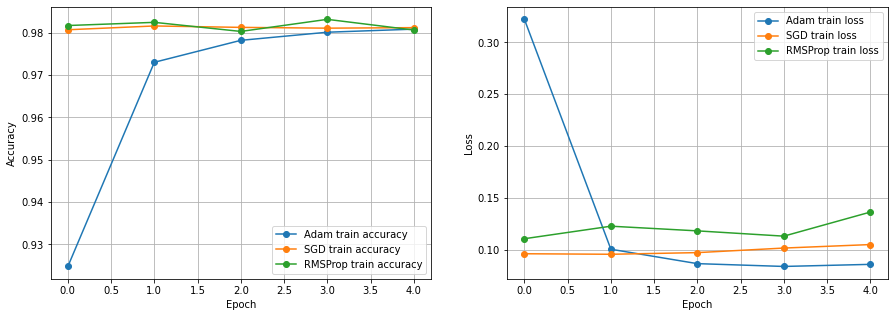

In [16]:
 plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(x.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(y.history['accuracy'], 'o-', label='RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='Adam train loss')
plt.plot(x.history['loss'], 'o-', label='SGD train loss')
plt.plot(y.history['loss'], 'o-', label='RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Comments

# With Normalized Data

In [17]:
h_normalized = adam_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2264 - accuracy: 0.9235 - val_loss: 0.0509 - val_accuracy: 0.9855
Epoch 2/5
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0397 - accuracy: 0.9885 - val_loss: 0.0594 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0334 - accuracy: 0.9905 - val_loss: 0.0518 - val_accuracy: 0.9883
Epoch 4/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.0631 - val_accuracy: 0.9856
Epoch 5/5
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0263 - accuracy: 0.9923 - val_loss: 0.0601 - val_accuracy: 0.9878


In [18]:
test_loss, test_acc = adam_model.evaluate(x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 7ms/step - loss: 0.0491 - accuracy: 0.9900

Test accuracy: 0.9900000095367432


In [20]:
x_normalized = sgd_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.0532 - val_accuracy: 0.9889
Epoch 2/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 0.0475 - val_accuracy: 0.9893
Epoch 3/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.0529 - val_accuracy: 0.9902
Epoch 4/5
1500/1500 [==============================] - 37s 24ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.0639 - val_accuracy: 0.9876
Epoch 5/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0186 - accuracy: 0.9951 - val_loss: 0.0627 - val_accuracy: 0.9891


In [21]:
test_loss, test_acc = sgd_model.evaluate(x_train_normalized, y_test)
print('\nTest accuracy:', test_acc)

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [22]:
y_normalized = rmsprop_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)


Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0182 - accuracy: 0.9953 - val_loss: 0.0575 - val_accuracy: 0.9897
Epoch 2/5
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0877 - val_accuracy: 0.9875
Epoch 3/5
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0162 - accuracy: 0.9962 - val_loss: 0.0693 - val_accuracy: 0.9906
Epoch 4/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 0.0777 - val_accuracy: 0.9901
Epoch 5/5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 0.0882 - val_accuracy: 0.9835


In [25]:
test_loss, test_acc =rmsrop_model.evaluate (x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

NameError: name 'rmsrop_model' is not defined

# Normalized vs without Normalized data (adam)


In [26]:
lt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(h_norma.history['accuracy'], 'o-', label = 'normalized data accuracy')
plt.plot(h_norma.history['val_accuracy'], 'o-', label = 'normalized validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.plot(h_norma.history['loss'], 'o-', label='normalized data loss')
plt.plot(h_norma.history['val_loss'], 'o-', label='normalized validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

NameError: name 'lt' is not defined

# Analyzing the affect of using and not using data normalization:

Using normalized data in this model we got more accuracy than prior.
We can see in the above mentioned graph that the Adam's function performed much better accuracy in 1st epoch for normalized data. If we compare then we will see that the comparsion of accuracy was like this Adam>SGD>RMSprop.  Apparetly By using the data visualization we achieved more precision in our data training . 

From the below visualization graph, we find in every optimization function has more accuracy for normalization data.

# Displaying   normalized data in various optimization function 

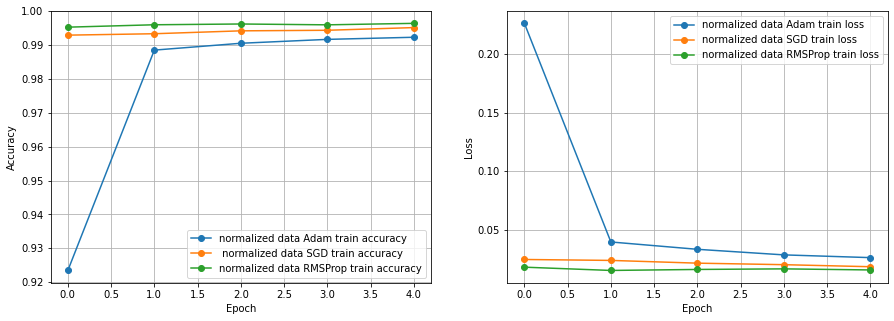

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h_normalized.history['accuracy'], 'o-', label='normalized data Adam train accuracy')
plt.plot(x_normalized.history['accuracy'], 'o-', label=' normalized data SGD train accuracy')
plt.plot(y_normalized.history['accuracy'], 'o-', label='normalized data RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h_normalized.history['loss'], 'o-', label='normalized data Adam train loss')
plt.plot(x_normalized.history['loss'], 'o-', label='normalized data SGD train loss')
plt.plot(y_normalized.history['loss'], 'o-', label='normalized data RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Predictions

In [40]:
predictions = adam_model.predict(x_test)

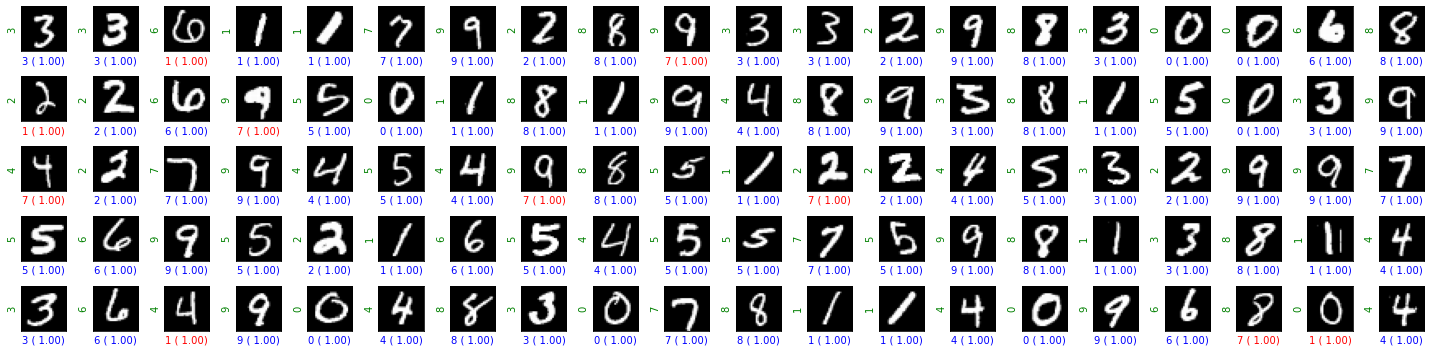

In [39]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = adam_model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()